# K-Nearest Neighbors - Introduction

 KNN is an effective classification and regression algorithm that uses nearby points in order to generate a prediction. 

The K-Nearest Neighbors algorithm works as follows:

    Choose a point
    Find the K-nearest points
        K is a predefined user constant such as 1, 3, 5, or 11
    Predict a label for the current point:
        Classification - Take the most common class of the k neighbors
        Regression - Take the average target metric of the k neighbors
        Both classification or regression can also be modified to use weighted averages based on the distance of the neighbors


## Distance metrics

An incredibly important decision when using the KNN algorithm is determining an appropriate distance metric. This makes a monumental impact to the output of the algorithm

## K-means

While outside the scope of this section, it is worth mentioning the related K-means algorithm which uses similar principles as KNN but serves as an unsupervised learning clustering algorithm. In the K-means algorithm,

## Assumption

The assumption that distance-based classifiers like KNN are built on is that distance helps us quantify similarity. Objects that are more alike are more likely to be the same class. By treating each column in your dataset as a separate dimension, you can plot each data point that you have and measure the distance between them!

## Manhattan distance

Manhattan distance is aptly named, because it measures the distance from one point to another traveling along the axes of a grid.



## Euclidean distance

The equation at the heart of this one is probably familiar to you: , or the Pythagorean theorem! T

## Minkowski distance

The Minkowski distance is a generalized distance metric across a Normed Vector Space

## Finding the optimal number of neighbors

what is the best value to use for K? There's no set number that works best. If there was, it wouldn't be called K-nearest neighbors. While the best value for K is not immediately obvious for any problem, there are some strategies that you can use to select a good or near optimal value

## Iterating over values of K

Since the model arrives at a prediction by voting, it makes sense that you should only use odd values for k, to avoid ties and subsequent arbitrary guesswork. By adding this constraint (an odd value for k) the model will never be able to evenly split between two classes. From here, finding an optimal value of K requires some iterative investigation.

The best way to find an optimal value for K is to choose a minimum and maximum boundary and try them all! In practice, this means:

-    Fit a KNN classifier for each value of K
-    Generate predictions with that model
-    Calculate and evaluate a performance metric using the predictions the model made
-    Compare the results for every model and find the one with the lowest overall error, or highest overall score!


## KNN and the curse of dimensionality

Note that KNN isn't the best choice for extremely large datasets, and/or models with high dimensionality. This is because the time complexity (what computer scientists call "Big O", which you saw briefly earlier) of this algorithm is exponential.

## Practical Example

In [1]:
#  imports 

import numpy as np
import pandas as pd 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
# load data 

df = pd.read_csv("./data/diabetes.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/diabetes.csv'

## EDA

In [34]:
# dataframe shape 

df.shape

(768, 9)

In [35]:
# column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [38]:
# sns.pairplot(df)


## The Question creeping out of this summary
Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

    Glucose
    BloodPressure
    SkinThickness
    Insulin
    BMI



*More  on this later*

## Preprocessing

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# create model inputs
x = df.drop('Outcome',axis=1)
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [41]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
# test train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)

In [43]:
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 


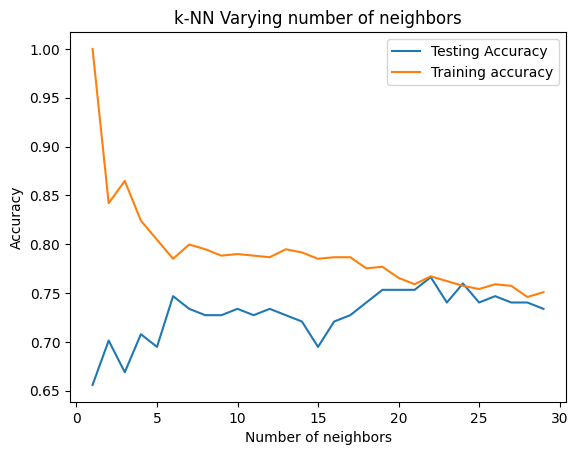

In [44]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.


In [45]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=23)

In [46]:
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [47]:
knn.score(x_test,y_test)

0.7402597402597403

## Model 2

KNNS with nans replaced 

In [48]:
# It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df.isna().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


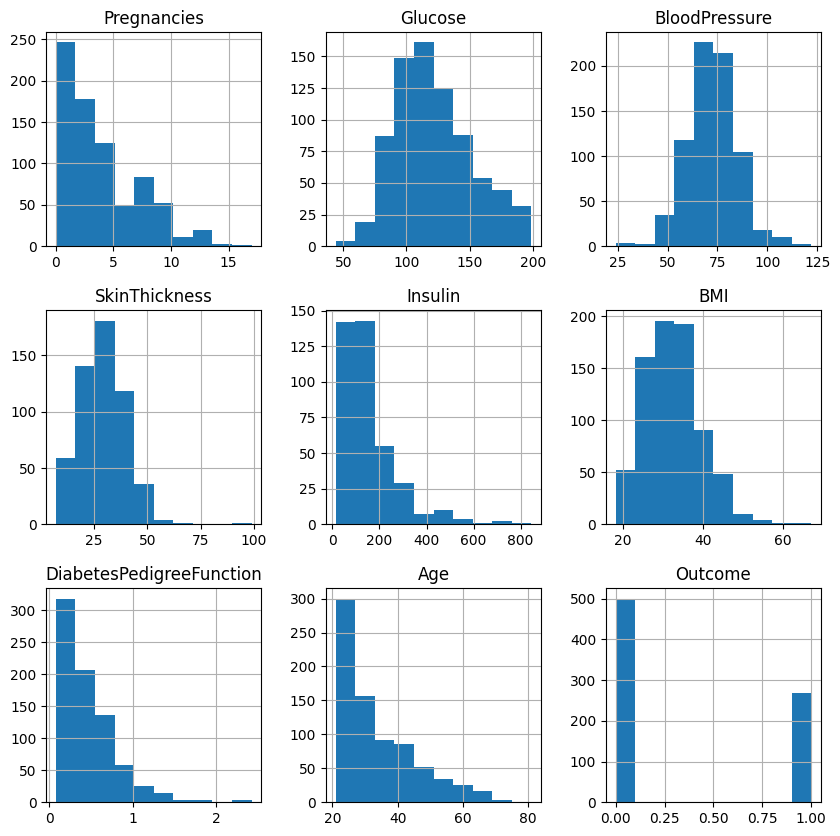

In [49]:
# check on data distribution to determine values to replace NAN with
p = df.hist(figsize = (10,10))

In [50]:
# Normal distribution replace with mean
# Skewed distribution replace with median


df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)


Ploting after nan removal

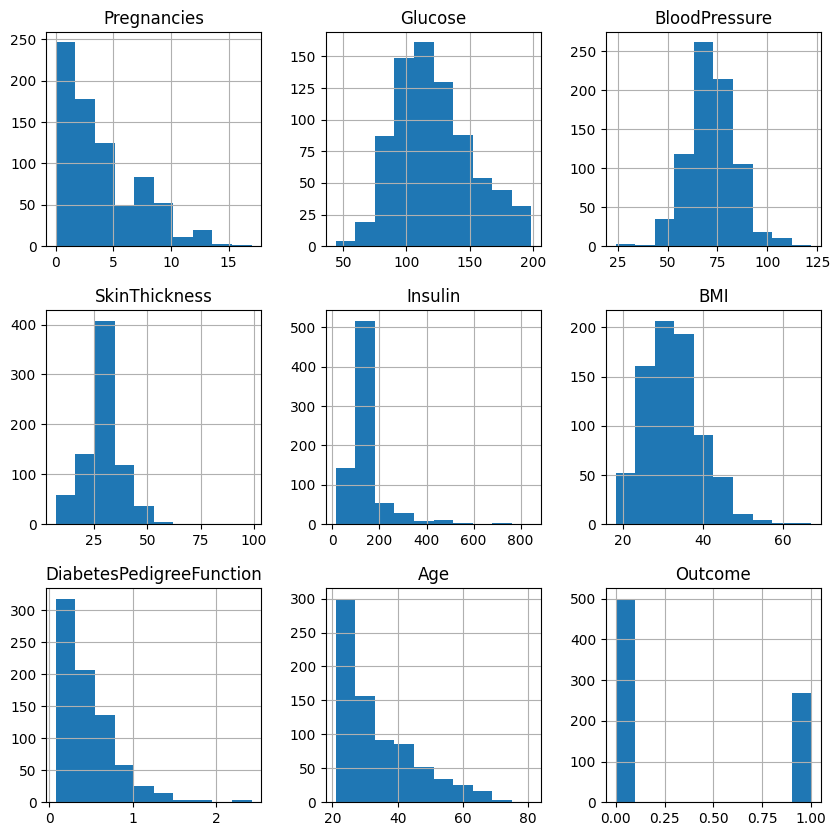

In [51]:

p=df.hist(figsize = (10,10))


In [52]:
# p=sns.pairplot(df, hue = 'Outcome' ,height=10)


scale Data

In [53]:
#scale data
scale_x = StandardScaler()
x =  pd.DataFrame(scale_x.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [54]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [55]:
y = df["Outcome"]

In [56]:
#test train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)


In [57]:

# modeling 

from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(5,20):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

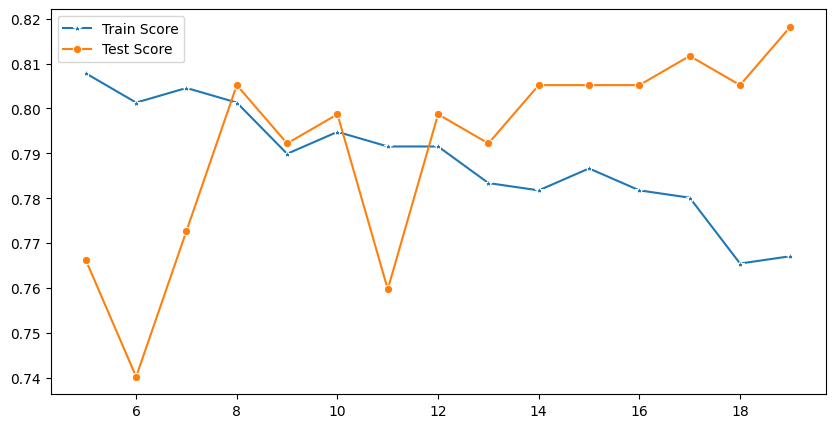

In [58]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=range(5,20),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(5,20),y=test_scores,marker='o',label='Test Score')


# here we choose k based on Training and Test Accuracy background 
# - highest Training score accuracy
# - highest test score accuracy

In [59]:
knn = KNeighborsClassifier(8)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8051948051948052